<h1> Russia Houses Sales </h1>

<p>date : date of publication of the announcement </p>
<p>time : the time when the ad was published </p>
<p>geo_lat : Latitude </p>
<p>geo_lon : Longitude </p>
<p>region : Region of Russia. There are 85 subjects in the country in total </p>
<p>building_type - Facade type  : 0-Other . 1-Panel . 2-Monolithic . 3-Brick . 4-Blocky . 5-Wooden </p>
<p>object_type - Apartment type  : 1-Secondary real estate market . 2-New building </p>
<p>level : Apartment floor </p>
<p>levels : Number of storeys </p>
<p>rooms : the number of living rooms</p>
<p>area : the total area of ​​the apartment </p>
<p>kitchen_area : Kitchen area </p>
<p>price : Price  (in rubles) </p>

In [1]:
from pandas import *
from numpy import *
from matplotlib.pyplot import *
import seaborn as sns

C:\Users\W.I\AppData\Local\Temp\ipykernel_8248\27569263.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import *


In [2]:
data =  read_csv("russia houses i.csv")

In [3]:
data.sample(5)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
826282,1050000,1/31/2019,14:32:59,55.261818,61.398205,5282,3,3,5,1,31.9,6.0,1
19285,8400000,11/21/2018,17:48:00,43.627424,39.698749,2843,2,3,5,3,100.0,25.0,1
467284,2640000,9/20/2018,9:33:59,45.020806,39.106422,2843,3,4,5,3,70.0,10.0,1
232421,4620000,11/20/2018,6:12:11,54.724781,56.021178,2722,2,2,20,2,56.0,13.0,11
542716,1530000,1/17/2019,13:26:57,56.089061,47.276179,3019,3,7,9,1,36.0,9.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034750 entries, 0 to 1034749
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          1034750 non-null  int64  
 1   date           1034750 non-null  object 
 2   time           1034750 non-null  object 
 3   geo_lat        1034750 non-null  float64
 4   geo_lon        1034750 non-null  float64
 5   region         1034750 non-null  int64  
 6   building_type  1034750 non-null  int64  
 7   level          1034750 non-null  int64  
 8   levels         1034750 non-null  int64  
 9   rooms          1034750 non-null  int64  
 10  area           1034750 non-null  float64
 11  kitchen_area   1034750 non-null  float64
 12  object_type    1034750 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 102.6+ MB


<h2> Data Cleaning </h2>

In [5]:
data.duplicated().sum()

285

In [6]:
data.drop_duplicates(inplace= True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1034465.0,3.939348e+06,1.723555e+07,70000.000000,1.700000e+06,2.545000e+06,4.126000e+06,2.000000e+09
geo_lat,1034465.0,5.378468e+01,4.605379e+00,41.459089,5.338015e+01,5.503873e+01,5.591648e+01,7.198040e+01
geo_lon,1034465.0,5.532069e+01,2.101605e+01,19.903931,3.814696e+01,4.402524e+01,8.295041e+01,1.625361e+02
region,1034465.0,4.644734e+03,3.539501e+03,3.000000,2.661000e+03,3.019000e+03,9.654000e+03,6.188800e+04
building_type,1034465.0,1.900934e+00,1.044910e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
level,1034465.0,6.031362e+00,4.804755e+00,1.000000,2.000000e+00,5.000000e+00,8.000000e+00,3.900000e+01
levels,1034465.0,1.101786e+01,6.280018e+00,1.000000,5.000000e+00,1.000000e+01,1.600000e+01,3.900000e+01
rooms,1034465.0,1.851676e+00,8.783413e-01,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
area,1034465.0,5.417442e+01,2.680925e+01,1.000000,3.900000e+01,4.894000e+01,6.307000e+01,4.444000e+03
kitchen_area,1034465.0,1.046947e+01,5.500341e+00,0.030000,7.000000e+00,9.500000e+00,1.240000e+01,1.200000e+03


<h3>Dealing With Outliers</h3>

In [8]:
mean_ = data["price"].mean()
median_ = data["price"].median()
std_ = data["price"].std()

print(f"the mean of price value {mean_} \n and median {median_}\n and standard deviation {std_} ")


the mean of price value 3939347.7925304384 
 and median 2545000.0
 and standard deviation 17235552.757957157 


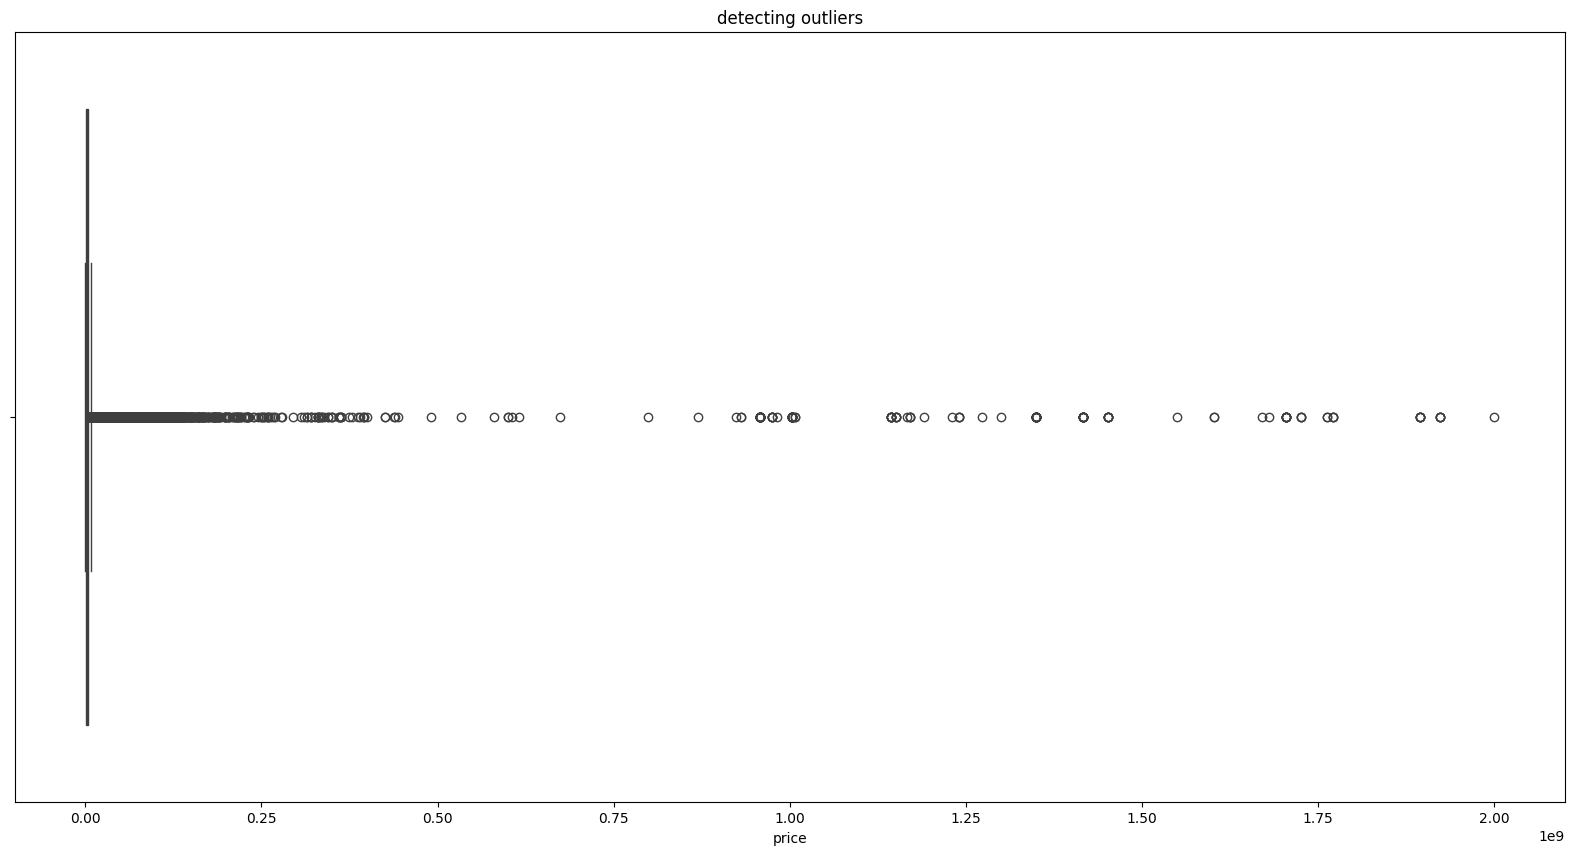

In [9]:
figure(figsize=(20,10))
sns.boxplot(x= data["price"])
title("detecting outliers")
show()

In [10]:
q1 = percentile(data["price"], 25)
q3 = percentile(data["price"], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [11]:
data.shape

(1034465, 13)

In [12]:
data = data[(data["price"] >= lower_bound) & (data["price"] <= upper_bound)]
data.shape

(953375, 13)

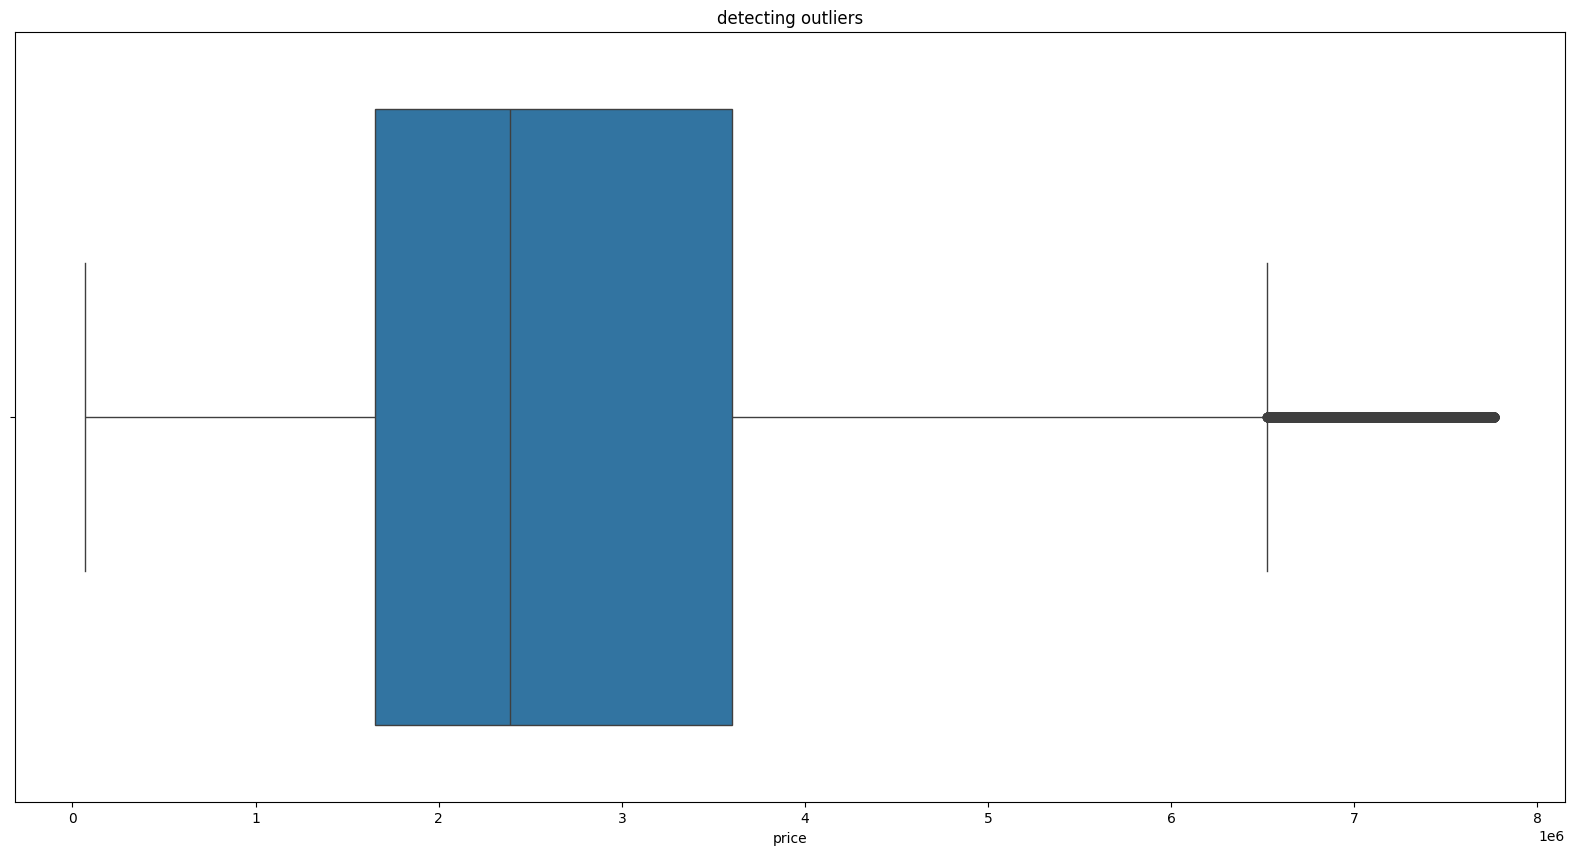

In [13]:
figure(figsize=(20,10))
sns.boxplot(x= data["price"])
title("detecting outliers")
show()

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,953375.0,2.814657e+06,1.562705e+06,70000.000000,1.650000e+06,2.390000e+06,3.600000e+06,7.764900e+06
geo_lat,953375.0,5.362072e+01,4.634357e+00,41.459089,5.331366e+01,5.502943e+01,5.591221e+01,7.198040e+01
geo_lon,953375.0,5.663514e+01,2.107432e+01,19.903931,3.897438e+01,4.794522e+01,8.295886e+01,1.625361e+02
region,953375.0,4.902059e+03,3.495765e+03,3.000000,2.843000e+03,3.230000e+03,9.654000e+03,6.188800e+04
building_type,953375.0,1.893439e+00,1.054864e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
level,953375.0,5.833691e+00,4.620499e+00,1.000000,2.000000e+00,5.000000e+00,8.000000e+00,3.900000e+01
levels,953375.0,1.067578e+01,6.061058e+00,1.000000,5.000000e+00,1.000000e+01,1.500000e+01,3.900000e+01
rooms,953375.0,1.782271e+00,8.337261e-01,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
area,953375.0,5.115350e+01,2.242967e+01,1.000000,3.800000e+01,4.700000e+01,6.000000e+01,4.444000e+03
kitchen_area,953375.0,9.978866e+00,4.818026e+00,0.030000,7.000000e+00,9.000000e+00,1.200000e+01,1.200000e+03


In [15]:
mean__ = data["price"].mean()
median__ = data["price"].median()
std__ = data["price"].std()

print(f"the mean of price value {mean__} \n and median {median__}\n and standard deviation {std__} ")

the mean of price value 2814657.0369812506 
 and median 2390000.0
 and standard deviation 1562705.0703054413 


<h2> Time Series Visual.</h2>

In [16]:
data["date"] = to_datetime(data["date"],format= "%m/%d/%Y")

In [17]:
from datetime import *
data["month"] = data["date"].dt.strftime("%m/%Y")

In [18]:
datetimeseries = DataFrame(data["price"].groupby(data["month"]).sum())
datetimeseries.reset_index(inplace= True)
datetimeseries.sort_values(by="price",ascending= True,inplace= True)
datetimeseries

,month,price
1,02/2018,10050000
4,05/2018,43748912
3,04/2018,79630000
5,06/2018,83560000
2,03/2018,93855620
6,07/2018,113741000
7,08/2018,231639790
0,01/2019,447983546937
8,09/2018,456024406956
9,10/2018,537551983722


C:\Users\W.I\AppData\Local\Temp\ipykernel_8248\1260879663.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= datetimeseries["month"], y= datetimeseries["price"].sort_values(ascending=True),ci=None,palette= "YlGnBu")
C:\Users\W.I\AppData\Local\Temp\ipykernel_8248\1260879663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= datetimeseries["month"], y= datetimeseries["price"].sort_values(ascending=True),ci=None,palette= "YlGnBu")


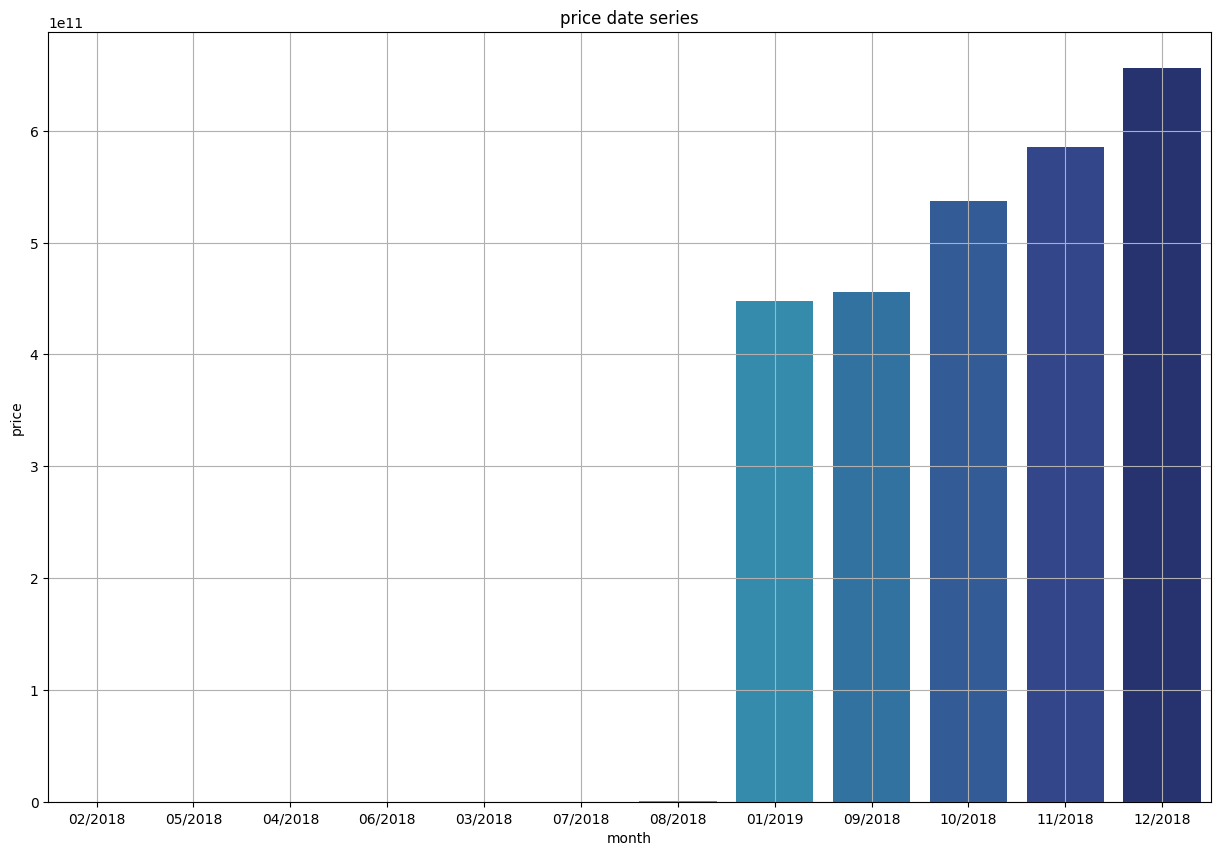

In [19]:
figure(figsize=(15,10))
sns.barplot(x= datetimeseries["month"], y= datetimeseries["price"].sort_values(ascending=True),ci=None,palette= "YlGnBu")
title("price date series")
grid(True)
show()


<h2>Data Visualization</h2>

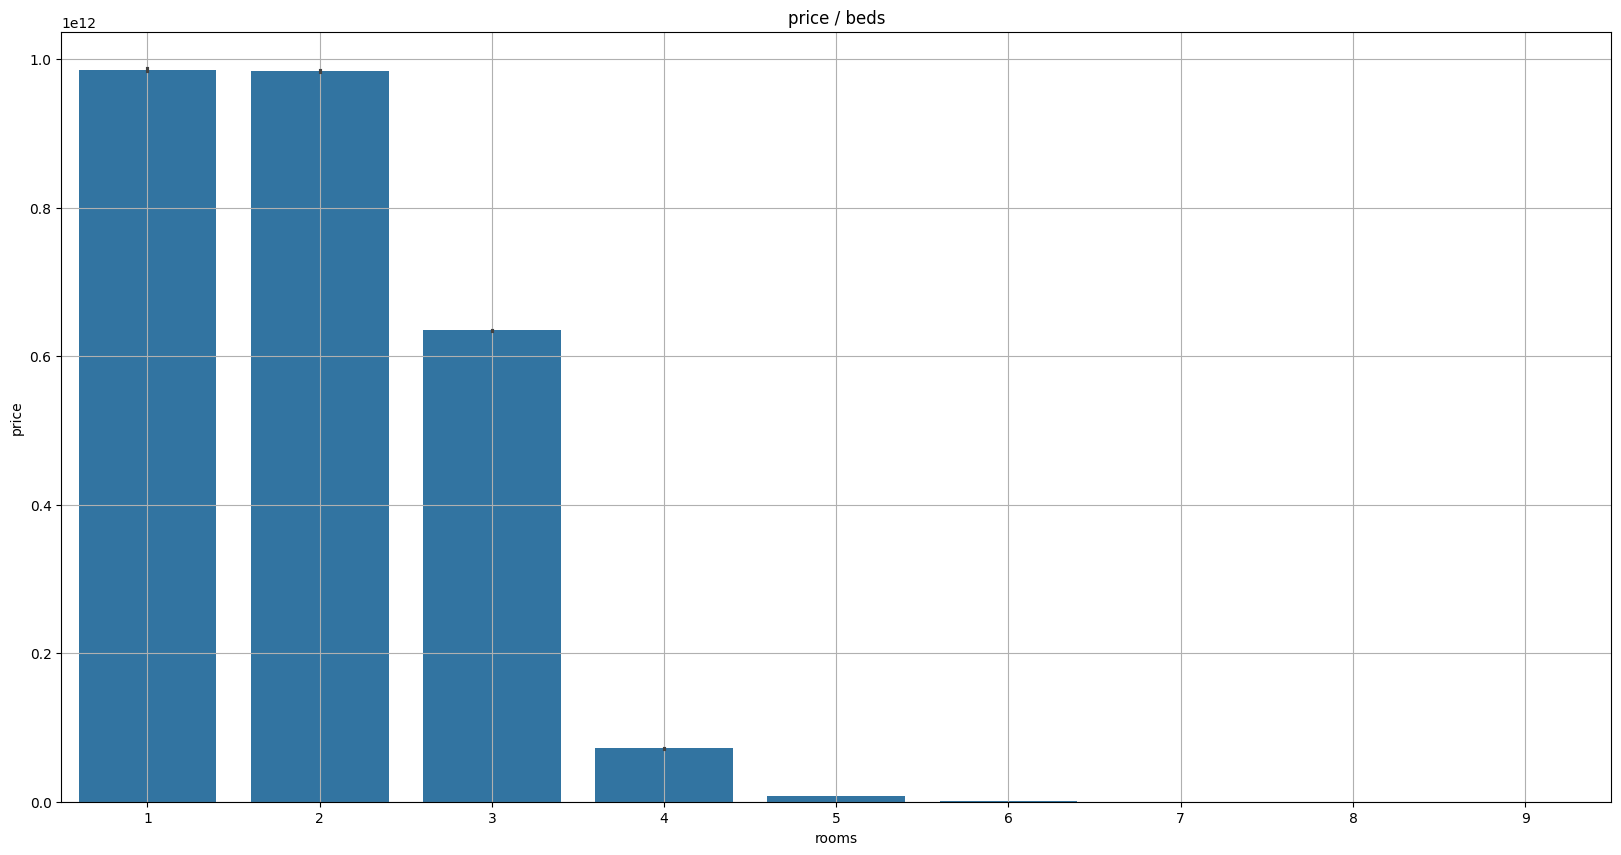

In [20]:
figure(figsize=(20,10))
sns.barplot(x= data["rooms"], y= data["price"] ,estimator= sum)
title("price / beds")
grid(True)
show()

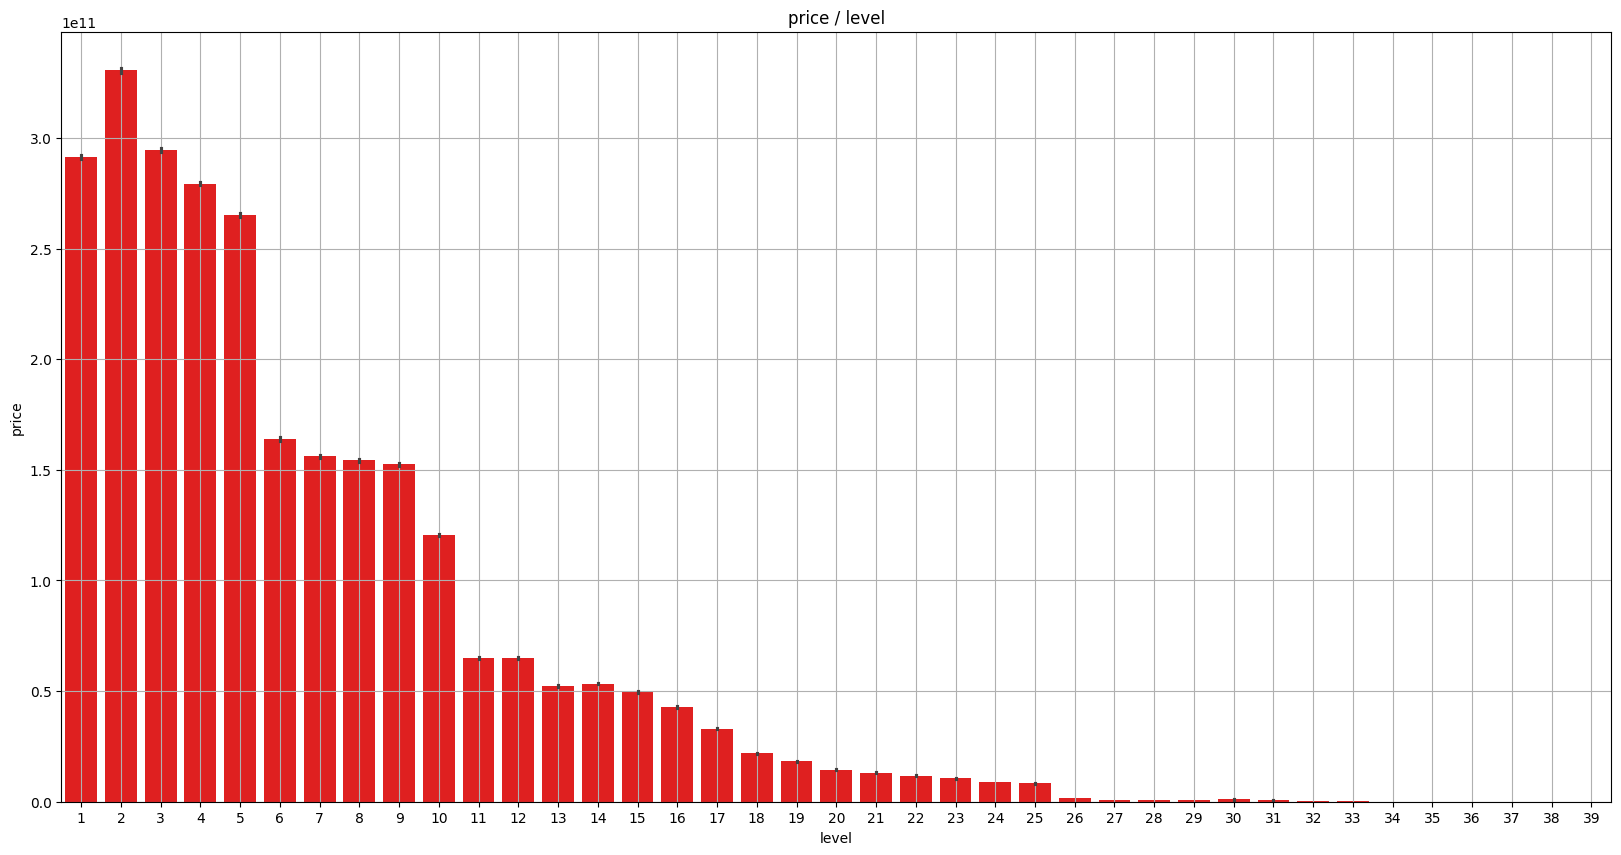

In [21]:
figure(figsize=(20,10))
sns.barplot(x= data["level"], y= data["price"] ,color= "red",estimator= sum)
title("price / level")
grid(True)
show()

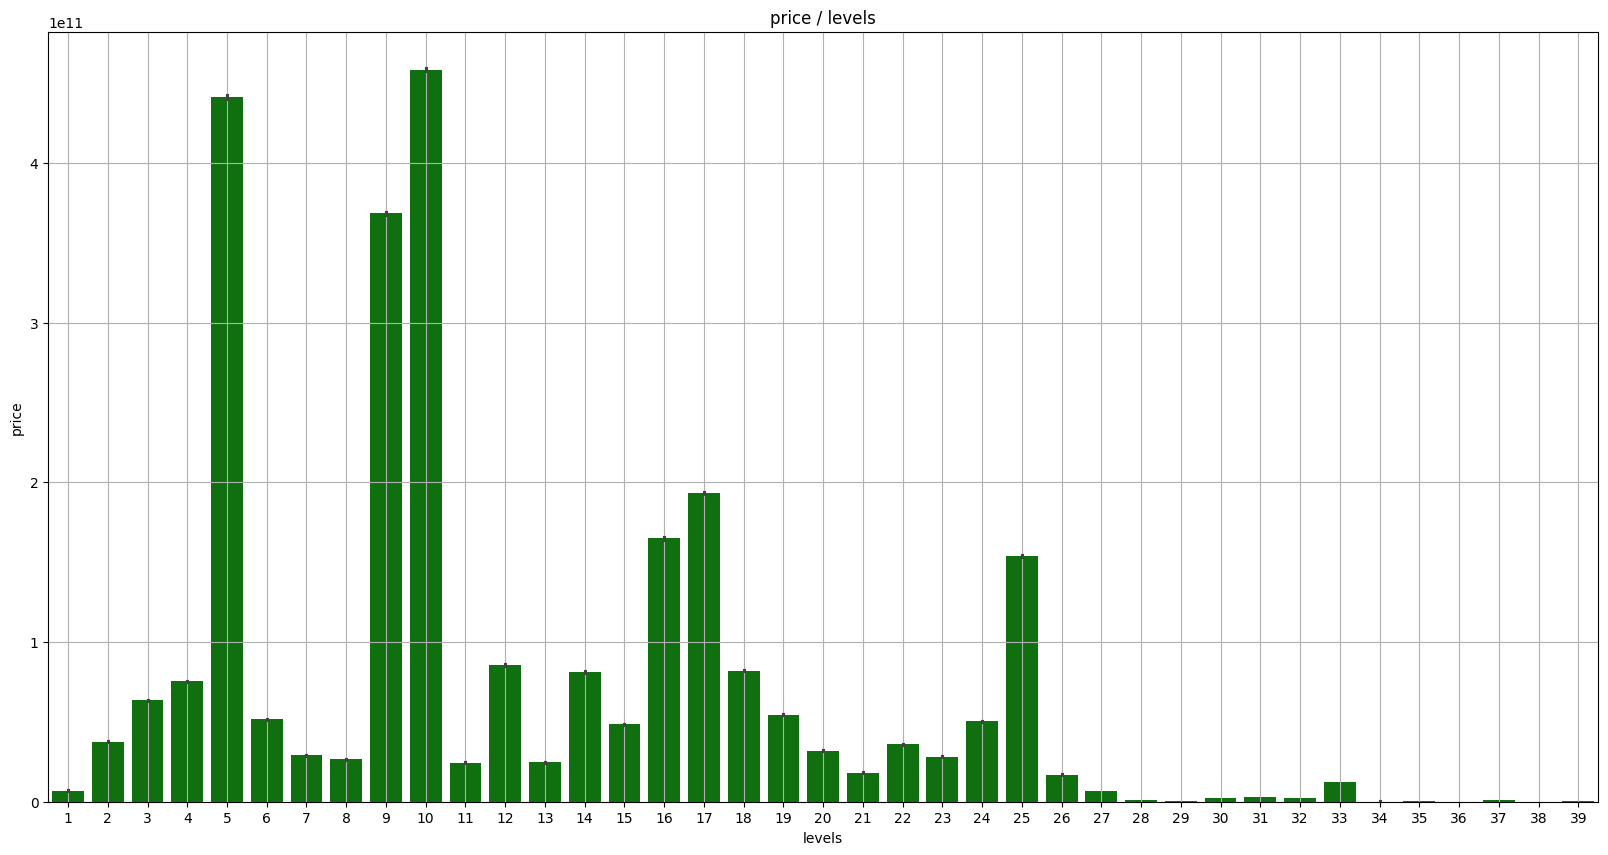

In [22]:
figure(figsize=(20,10))
sns.barplot(x= data["levels"], y= data["price"] , color="green",estimator= sum)
title("price / levels")
grid(True)
show()

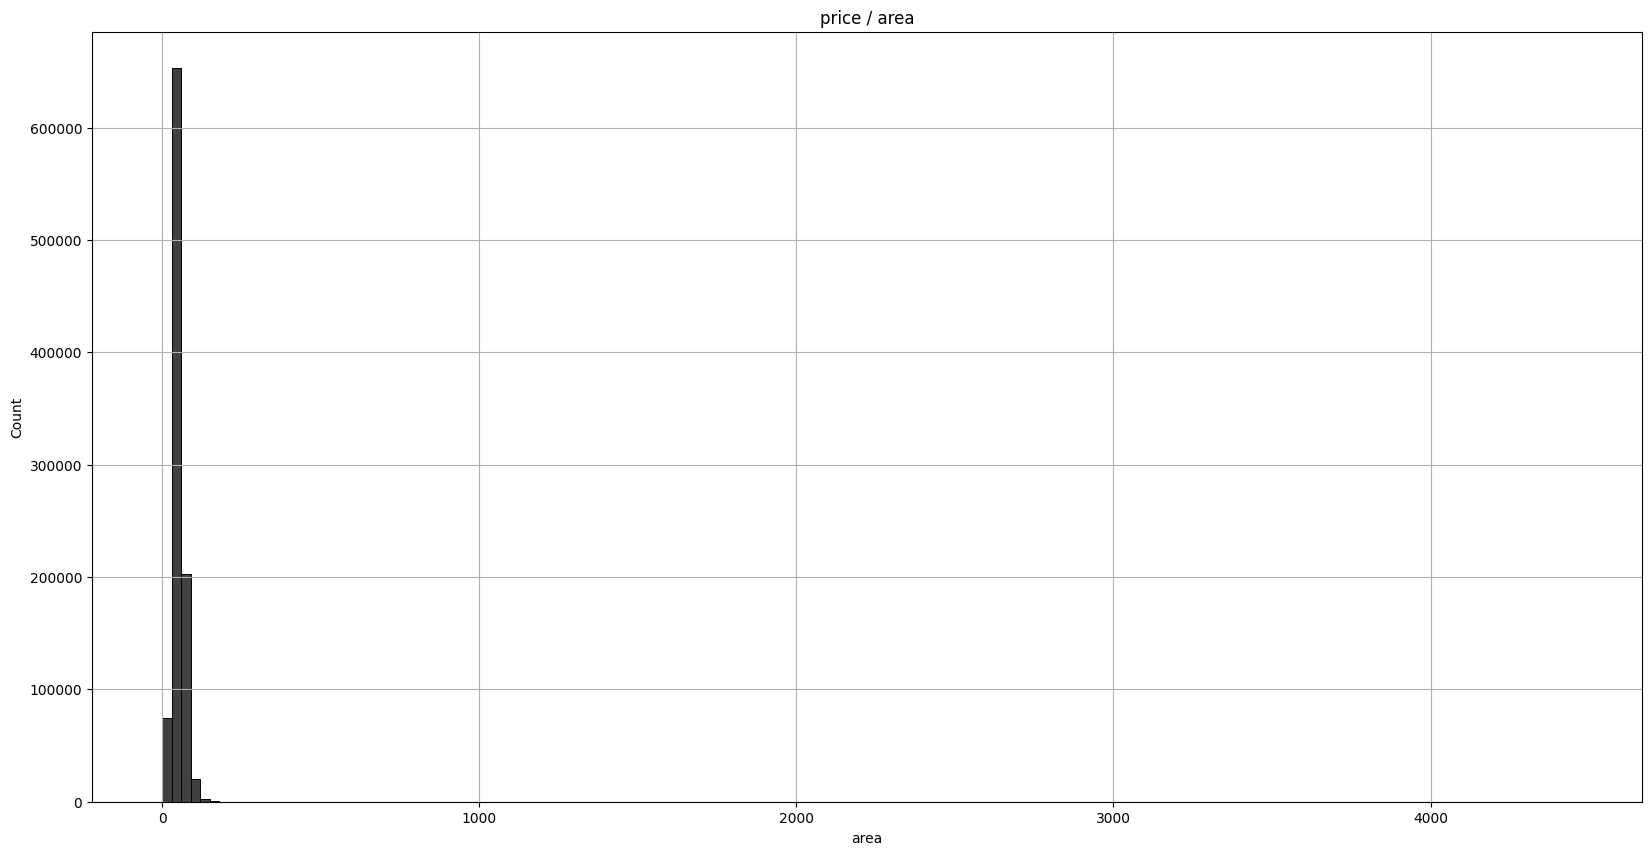

In [23]:
figure(figsize=(20,10))
sns.histplot(x= data["area"],binwidth= 30,color="black")
title("price / area")
grid(True)
show()

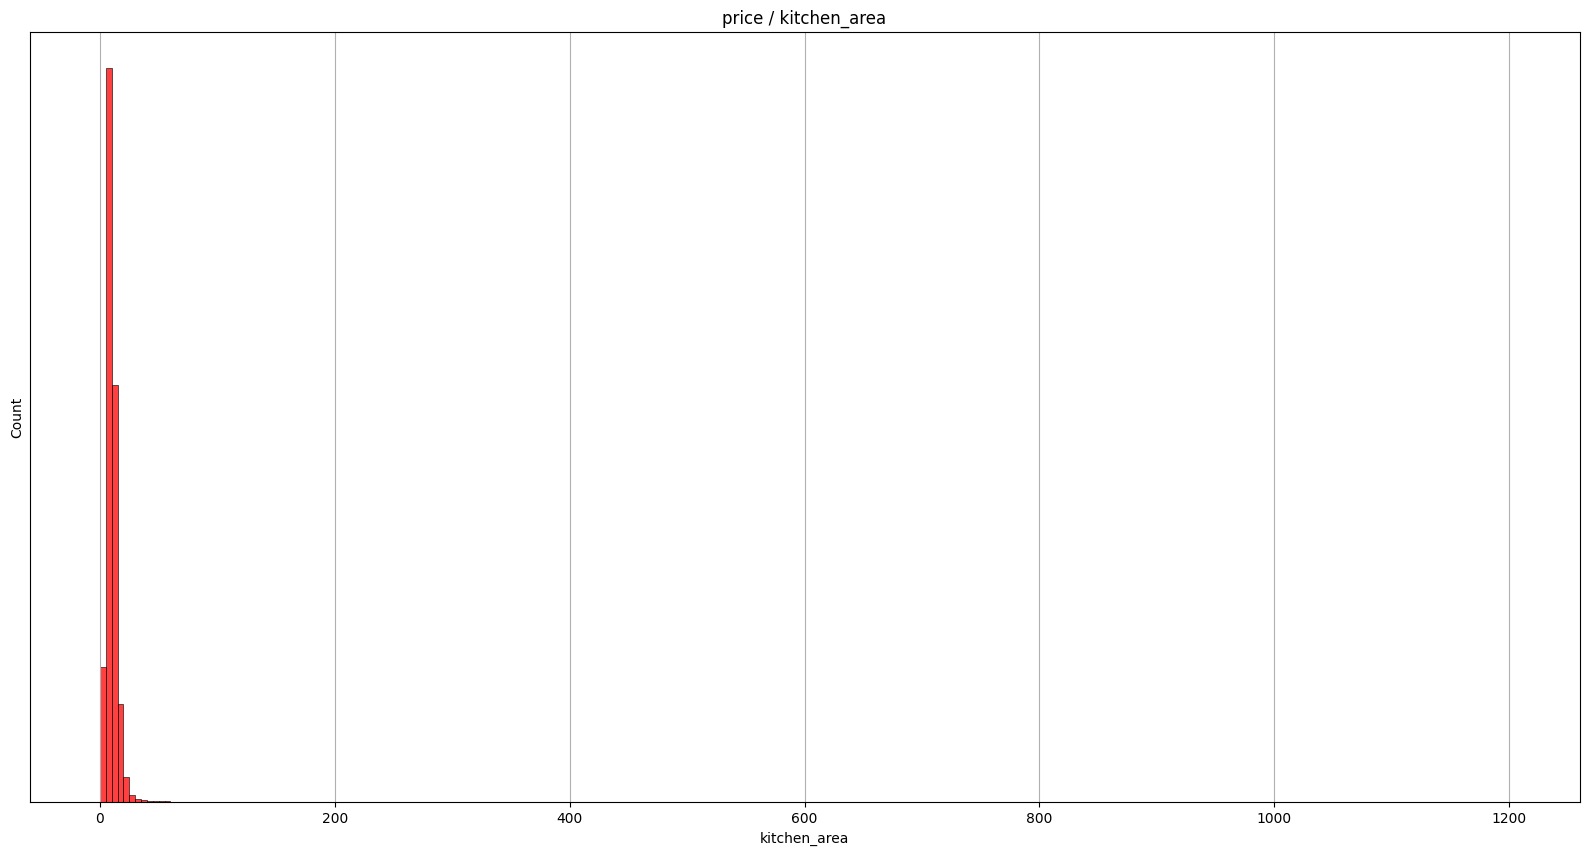

In [24]:
figure(figsize=(20,10))
sns.histplot(x= data["kitchen_area"],color= "red",binwidth= 5)
title("price / kitchen_area")
grid(True)
gca().set_yticks([])
show()

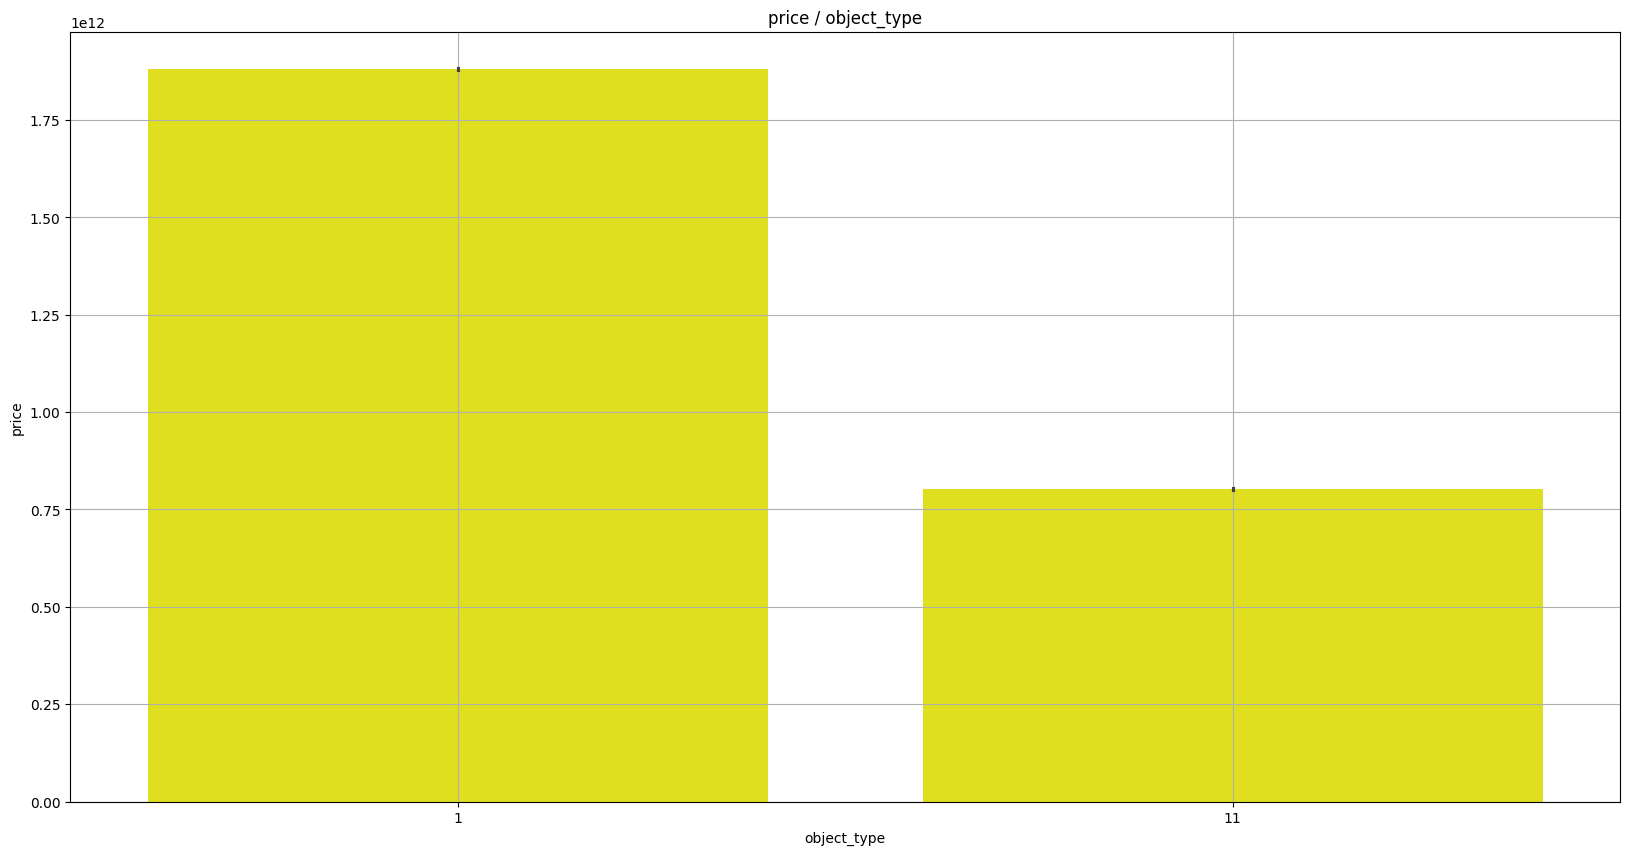

In [25]:
figure(figsize=(20,10))
sns.barplot(x= data["object_type"].sort_values(ascending= False), y= data["price"],color= 'yellow',estimator= sum)
title("price / object_type")
grid(True)
show()

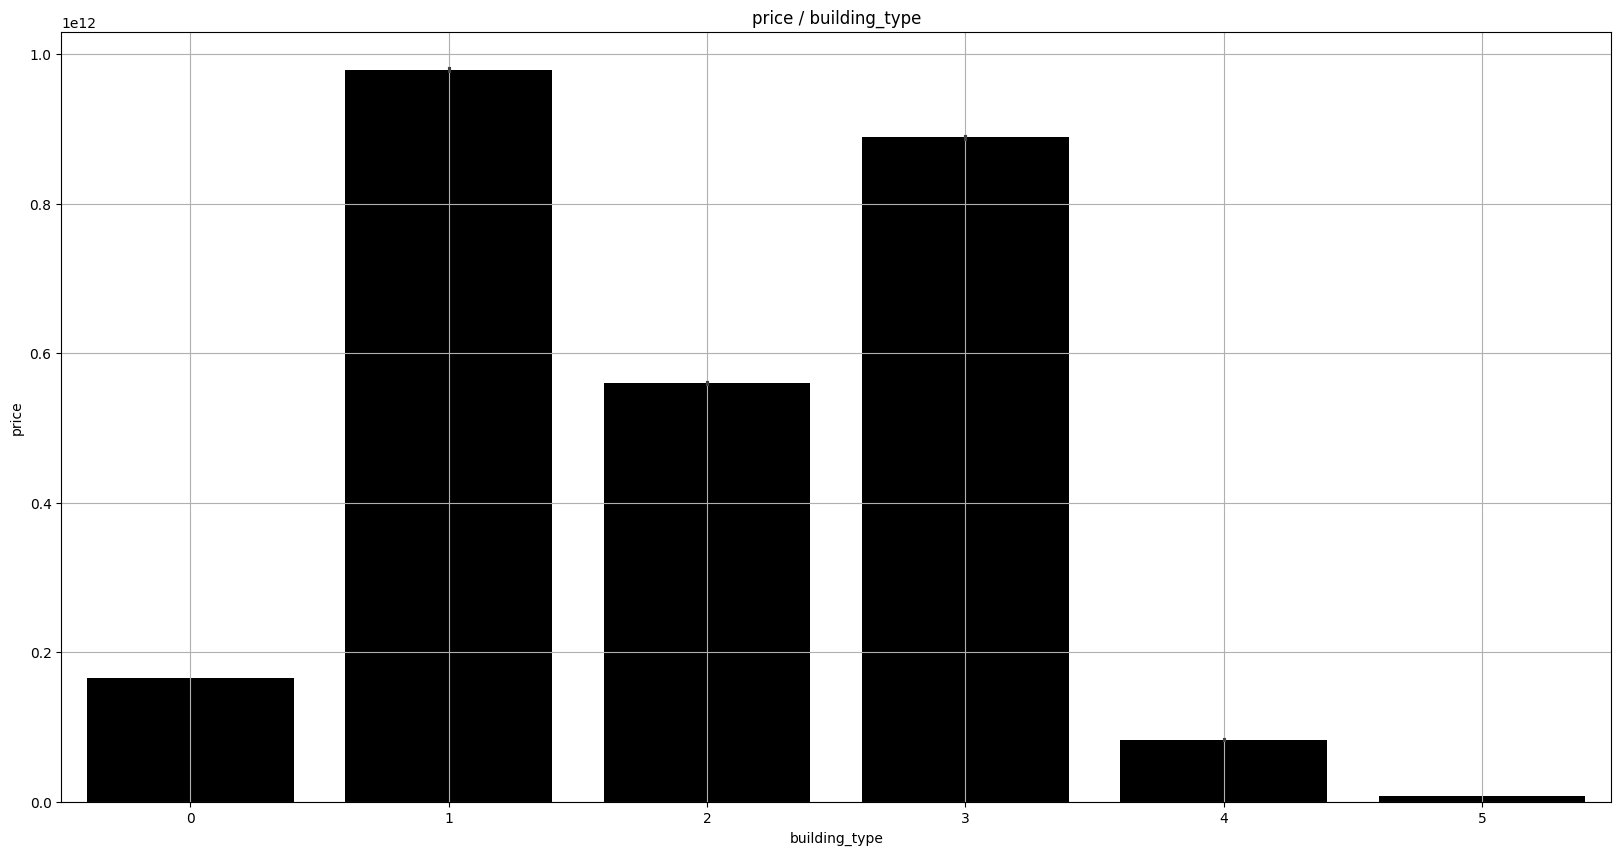

In [26]:
figure(figsize=(20,10))
sns.barplot(x= data["building_type"].sort_values(ascending= False), y= data["price"],color="black",estimator= sum)
title("price / building_type")
grid(True)
show()

<h4> sales location density  </h4>

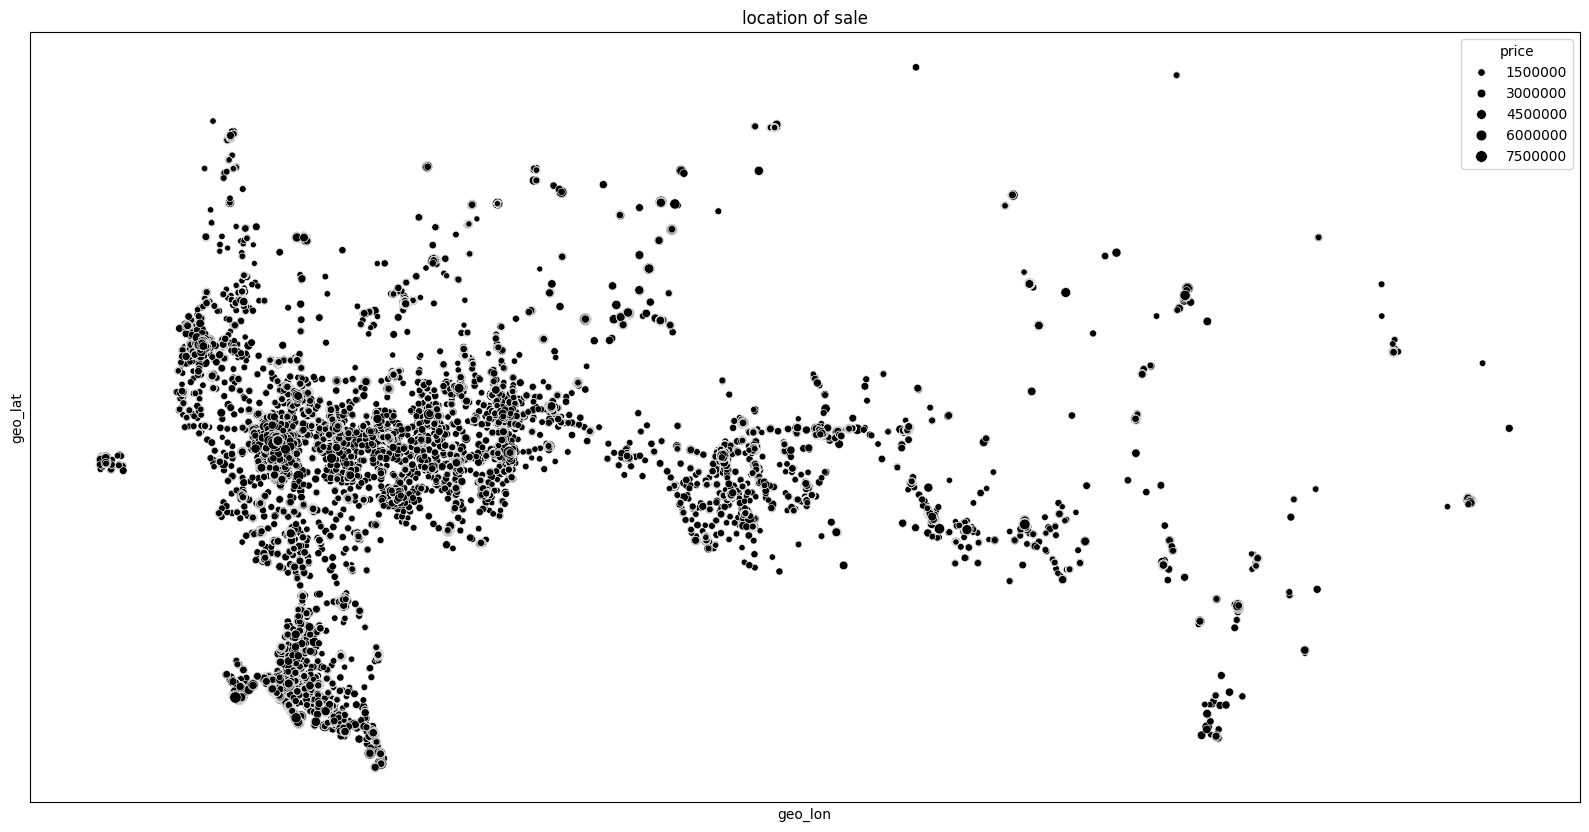

In [27]:
figure(figsize=(20,10))
sns.scatterplot(x= data["geo_lon"], y= data["geo_lat"],size= data["price"],color="black")
title("location of sale")
grid(True)
gca().set_xticks([])
gca().set_yticks([])
show()

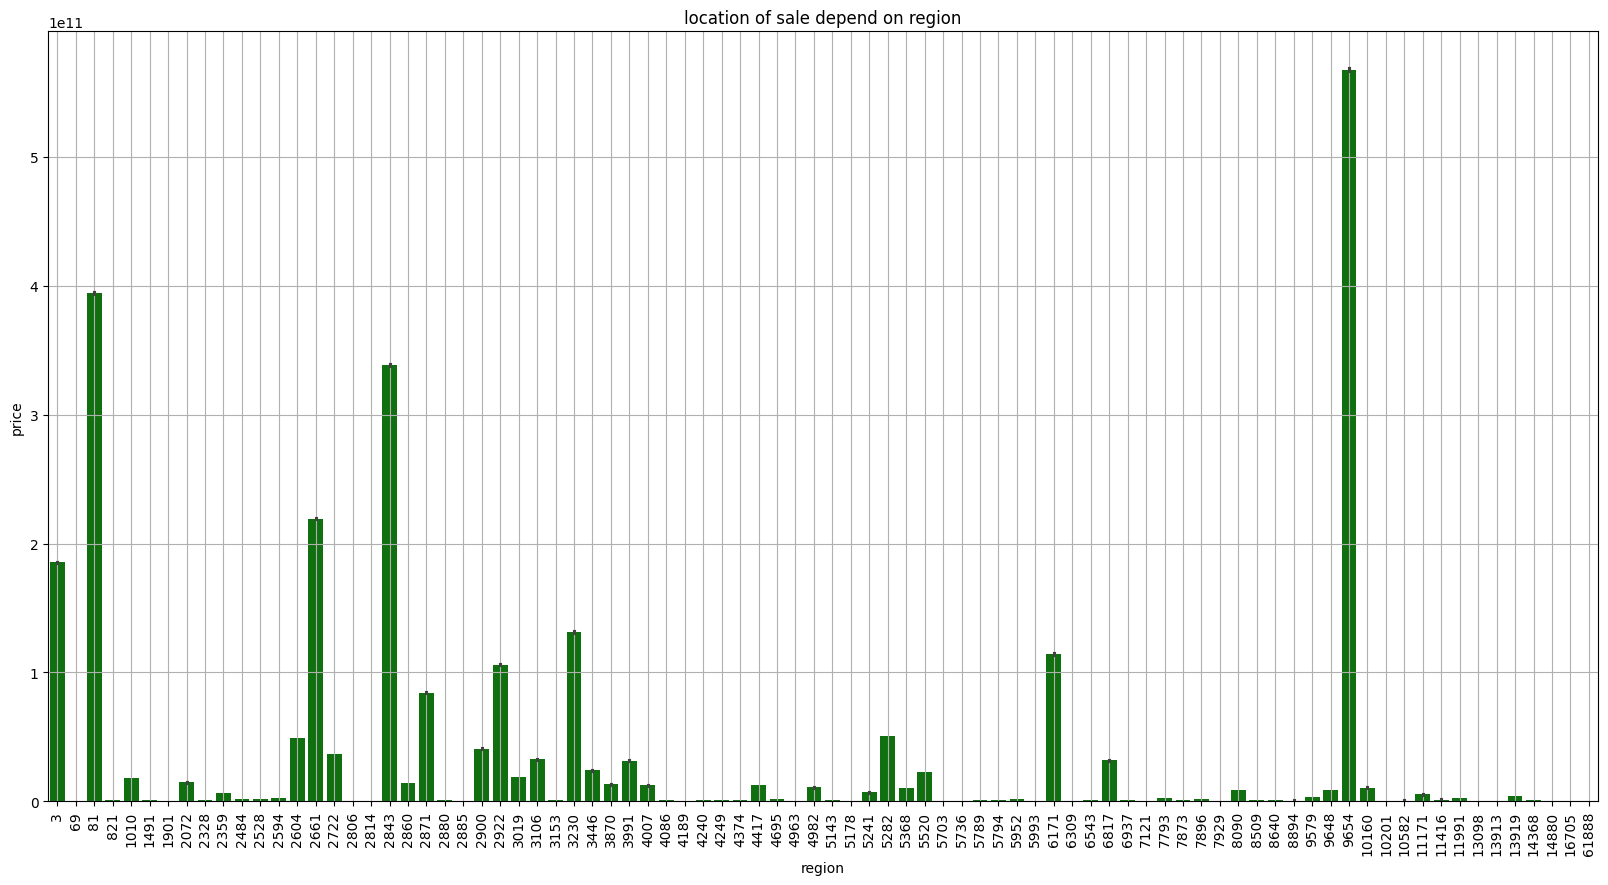

In [28]:
figure(figsize=(20,10))
sns.barplot(x= data["region"], y= data["price"],estimator= sum,color= "green")
title("location of sale depend on region")
grid(True)
xticks(rotation=90)
show()

<h3> Data Preprocessing  </h3>

In [29]:
data.drop(["date","time","month"] ,inplace= True , axis= 1 )


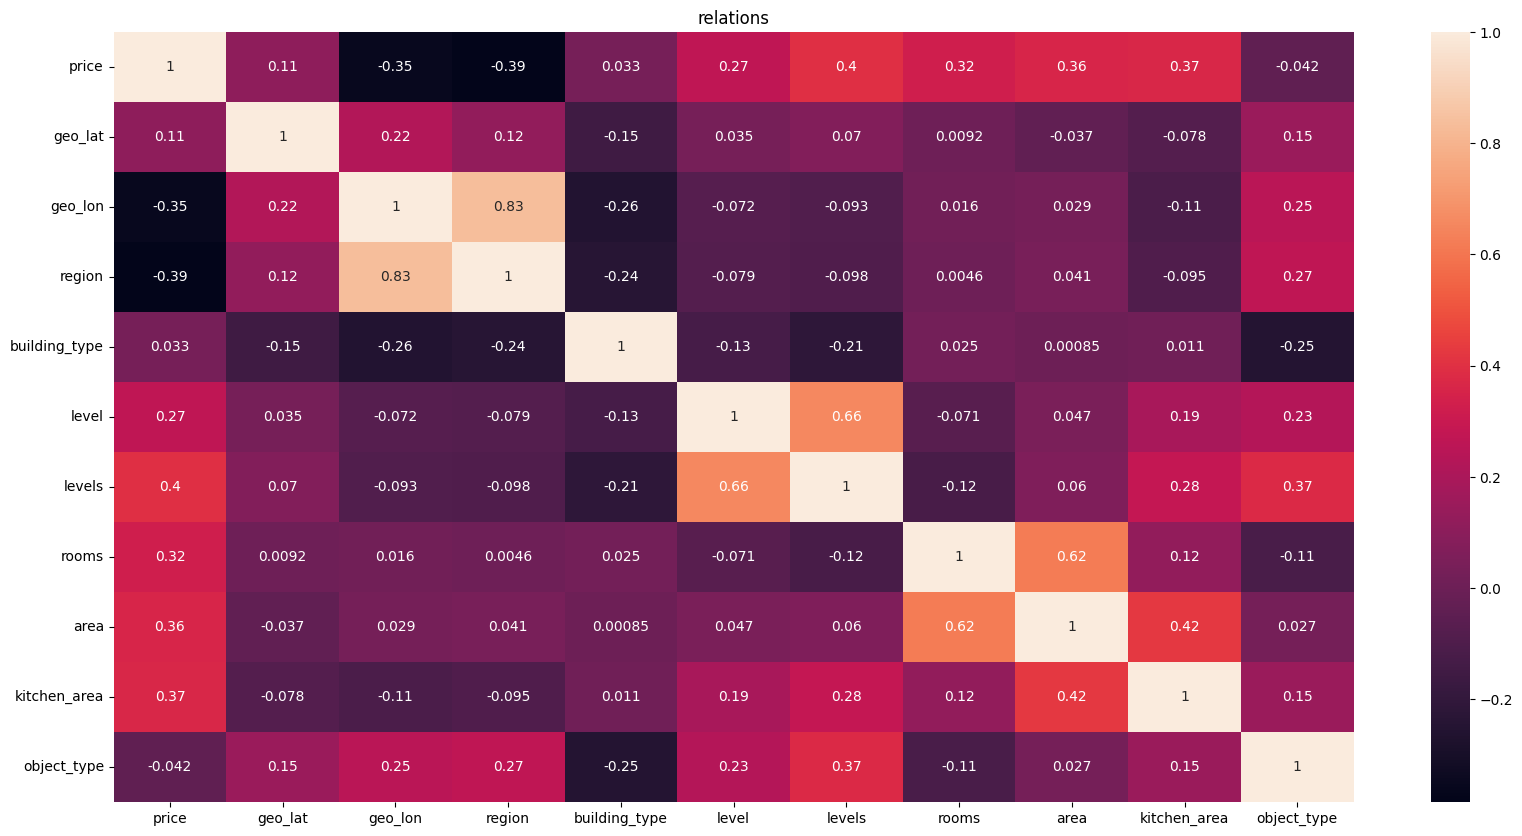

In [30]:
figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
title("relations")
show()

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["region"] = le.fit_transform(data["region"])
data["object_type"] = le.fit_transform(data["object_type"])

In [32]:
data.sample()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
486113,3950000,59.90848,30.34669,14,3,5,5,2,49.0,10.0,0


<h2> Data Spliting </h2>

In [33]:
from sklearn.model_selection import train_test_split

x = data.drop(["price"],axis= 1)
y = data["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

<h2>Data Modeling</h2>

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

In [35]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

lmedae = median_absolute_error(y_test,y_pred)
lmae = mean_absolute_error(y_test,y_pred)
lsme = mean_squared_error(y_test,y_pred)
lr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , lmedae)
print("mean absolute error is : " , lmae)
print("mean square error is : ",lsme)
print("r-squared is : " , lr2)

meadian absolute error is :  648755.7200903837
mean absolute error is :  823925.6243349102
mean square error is :  1223019922768.2712
r-squared is :  0.502395778328917


In [36]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

rfmedae = median_absolute_error(y_test,y_pred)
rfmae = mean_absolute_error(y_test,y_pred)
rfsme = mean_squared_error(y_test,y_pred)
rfr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , rfmedae)
print("mean absolute error is : " , rfmae)
print("mean square error is : ", rfsme)
print("r-squared is : " , rfr2)

meadian absolute error is :  105300.0
mean absolute error is :  233966.78511324513
mean square error is :  189063588741.48434
r-squared is :  0.9230766088347088


In [37]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)

gbmedae = median_absolute_error(y_test,y_pred)
gbmae = mean_absolute_error(y_test,y_pred)
gbsme = mean_squared_error(y_test,y_pred)
gbr2 = r2_score(y_test,y_pred)

print("median absolute error is : " , gbmedae)
print("mean absolute error is : " , gbmae)
print("mean square error is : ", gbsme)
print("r-squared is : " , gbr2)

median absolute error is :  363378.6871876293
mean absolute error is :  516735.39224150777
mean square error is :  532999123504.5085
r-squared is :  0.7831412153920547


In [38]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

y_pred = xgbr.predict(x_test)

xgbmedae = median_absolute_error(y_test,y_pred)
xgbmae = mean_absolute_error(y_test,y_pred)
xgbsme = mean_squared_error(y_test,y_pred)
xgbr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , xgbmedae)
print("mean absolute error is : " , xgbmae)
print("mean square error is : ", xgbsme)
print("r-squared is : " , xgbr2)

meadian absolute error is :  229862.0
mean absolute error is :  362107.1063949415
mean square error is :  307965550078.38306
r-squared is :  0.8746995408697881


In [39]:
knnr = KNeighborsRegressor()
knnr.fit(x_train,y_train)

y_pred = knnr.predict(x_test)

knnmedae = median_absolute_error(y_test,y_pred)
knnmae = mean_absolute_error(y_test,y_pred)
knnsme = mean_squared_error(y_test,y_pred)
knnr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , knnmedae)
print("mean absolute error is : " , knnmae)
print("mean square error is : ", knnsme)
print("r-squared is : " , knnr2)

meadian absolute error is :  190000.0
mean absolute error is :  374097.47647987417
mean square error is :  400495007389.41736
r-squared is :  0.8370525265164259


<h2> Model Evaluation</h2>

In [40]:
scores = {
    "median absolute error" :[ lmedae , xgbmedae , rfmedae , gbmedae , knnmedae ],
    "mean absolute error" : [ lmae , xgbmae , rfmae , gbmae , knnmae],
    "mean square error" : [ lsme , xgbsme , rfsme , gbsme , knnsme],
    "r-squared" : [ lr2 , xgbr2 , rfr2 , gbr2 , knnr2 ]
       }
indexes = [ "LinearRegression" , "XGBRegessor" , "RandomForestRegressor" , "GradientBoostingRegressor" , "KNeighborsRegressor"]
datascore = DataFrame(scores ,index= indexes)
datascore["r-squared"].astype("float64")
datascore["mean square error"].astype("float64")
datascore["mean absolute error"].astype("float64")
datascore["median absolute error"].astype("float64")
datascore.head(5)


,median absolute error,mean absolute error,mean square error,r-squared
LinearRegression,648755.720090,823925.624335,1.223020e+12,0.502396
XGBRegessor,229862.000000,362107.106395,3.079656e+11,0.874700
RandomForestRegressor,105300.000000,233966.785113,1.890636e+11,0.923077
GradientBoostingRegressor,363378.687188,516735.392242,5.329991e+11,0.783141
KNeighborsRegressor,190000.000000,374097.476480,4.004950e+11,0.837053


C:\Users\W.I\AppData\Local\Temp\ipykernel_8248\387659135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["r-squared"],palette= "mako" )


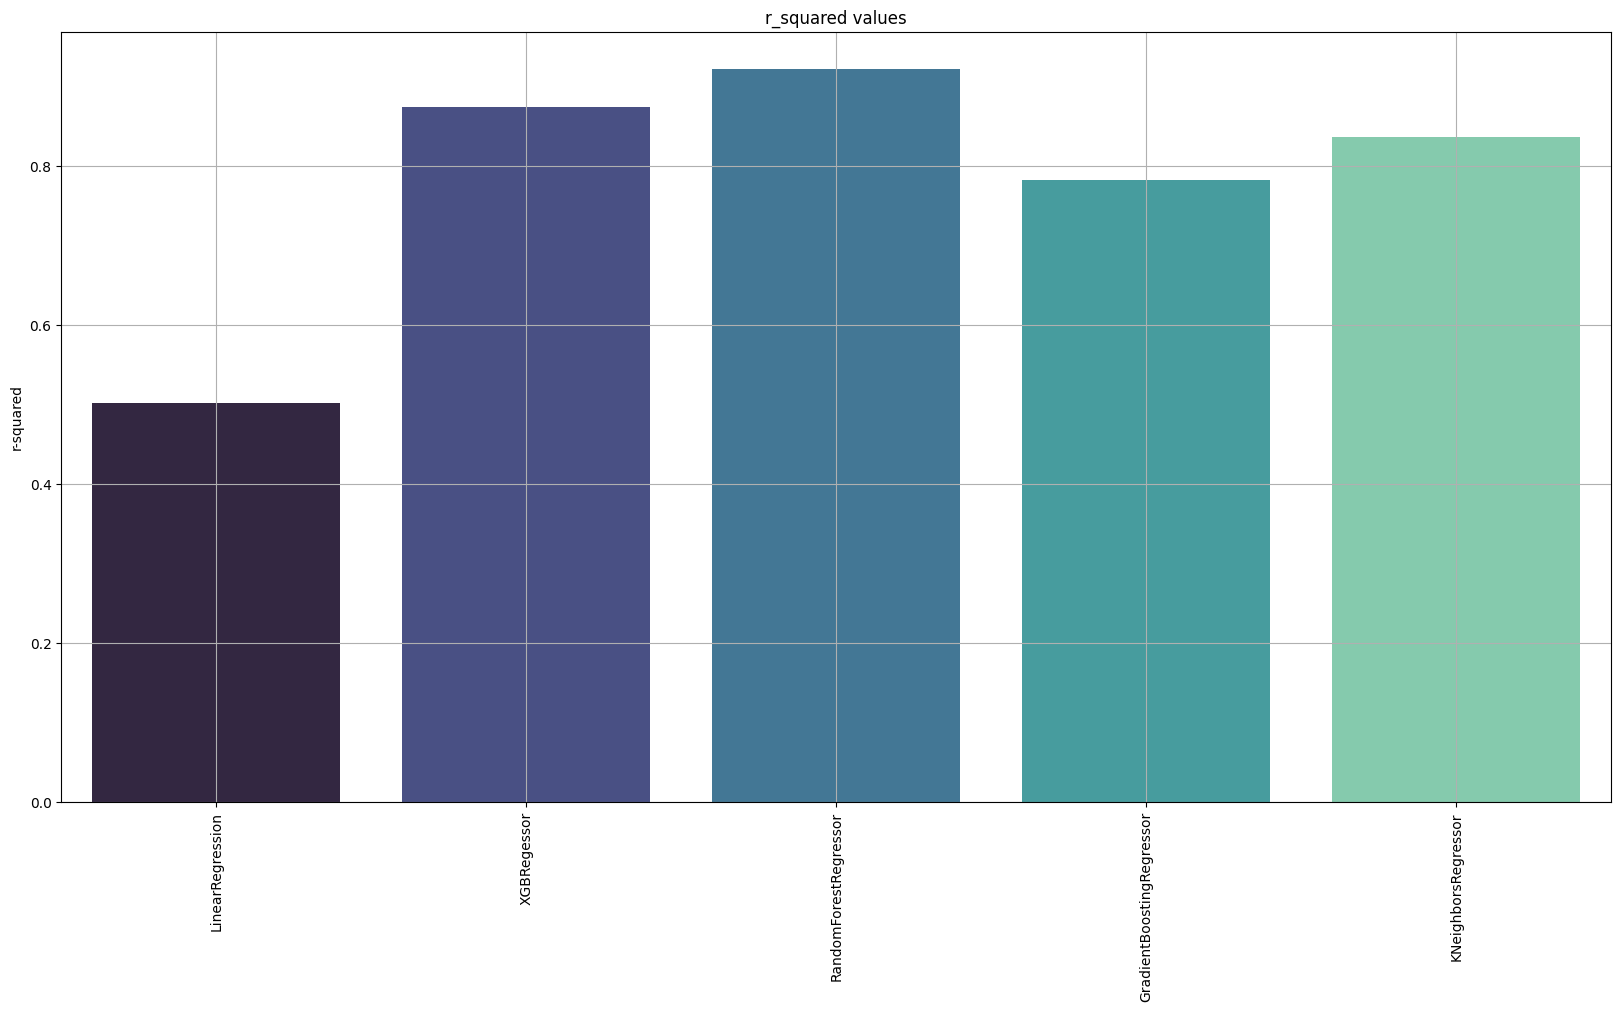

In [41]:
figure(figsize=(20,10))
sns.barplot( datascore["r-squared"],palette= "mako" )
title("r_squared values")
grid(True)
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_8248\1776364678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["mean square error"] , palette= "deep" )


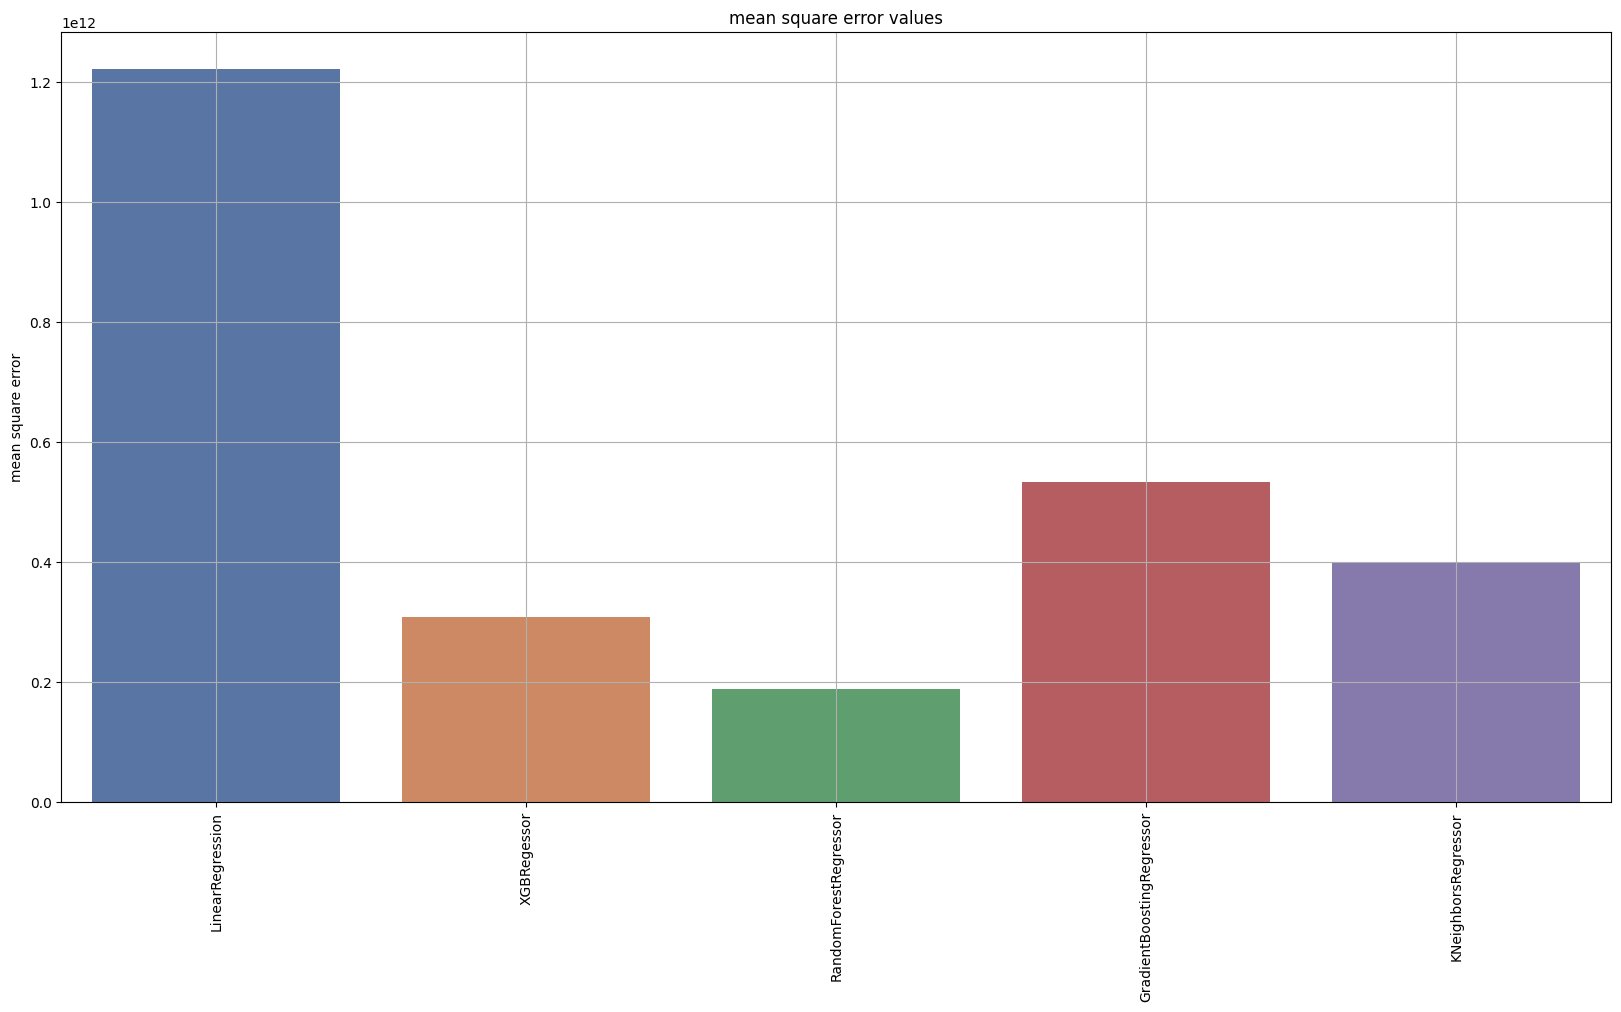

In [42]:
figure(figsize=(20,10))
sns.barplot( datascore["mean square error"] , palette= "deep" )
title("mean square error values")
grid(True)
xticks(rotation=90)
show()